In [1]:
cd AInotebooks

[Errno 2] No such file or directory: 'AInotebooks'
/home/sacha/AInotebooks


In [2]:
import os
from pathlib import Path
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

2022-09-12 16:46:29.834473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 16:46:29.986801: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 16:46:30.570176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /anaconda/lib/python3.9/site-packages/cv2/../../lib64:
2022-09-12 16:46:30.570245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

Num GPUs Available:  3


2022-09-12 16:46:31.289271: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 16:46:32.549862: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8815 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:0a:00.0, compute capability: 7.5
2022-09-12 16:46:32.550668: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 8815 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:42:00.0, compute capability: 7.5
2022-09-12 16:46:32.551209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/tas

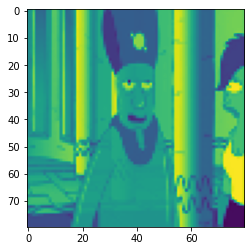

In [4]:
im = cv2.imread('img/Futurama_7_15601.png', 0) 
im = cv2.resize(im ,(80,80))
plt.imshow(im)


In [5]:
root_images_path = "./img"
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])
num_img = 2600

train = []
test = []
for i, filename in list(zip([j for j in range(7000)],os.listdir('./img'))):
    if i < num_img:
        im = cv2.imread('./img/' + filename) 
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im = cv2.resize(im ,(80,80))
        train.append(im)
    elif num_img <= i < num_img+300:
        im = cv2.imread('./img/' + filename) 
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im = cv2.resize(im ,(80,80))
        test.append(im)
    else:
        break

In [6]:
X_train=np.array(train)/255
X_test=np.array(test)/255

In [7]:
X_train.shape

(2600, 80, 80, 3)

In [8]:
X_train = X_train.reshape((num_img,80,80,3))
X_test = X_test.reshape((300,80,80,3))


In [9]:
images_path

[PosixPath('img/Futurama_1_00001.png'),
 PosixPath('img/Futurama_1_00025.png'),
 PosixPath('img/Futurama_1_00049.png'),
 PosixPath('img/Futurama_1_00073.png'),
 PosixPath('img/Futurama_1_00097.png'),
 PosixPath('img/Futurama_1_00121.png'),
 PosixPath('img/Futurama_1_00145.png'),
 PosixPath('img/Futurama_1_00169.png'),
 PosixPath('img/Futurama_1_00193.png'),
 PosixPath('img/Futurama_1_00217.png'),
 PosixPath('img/Futurama_1_00241.png'),
 PosixPath('img/Futurama_1_00265.png'),
 PosixPath('img/Futurama_1_00289.png'),
 PosixPath('img/Futurama_1_00313.png'),
 PosixPath('img/Futurama_1_00337.png'),
 PosixPath('img/Futurama_1_00361.png'),
 PosixPath('img/Futurama_1_00385.png'),
 PosixPath('img/Futurama_1_00409.png'),
 PosixPath('img/Futurama_1_00433.png'),
 PosixPath('img/Futurama_1_00457.png'),
 PosixPath('img/Futurama_1_00481.png'),
 PosixPath('img/Futurama_1_00505.png'),
 PosixPath('img/Futurama_1_00529.png'),
 PosixPath('img/Futurama_1_00553.png'),
 PosixPath('img/Futurama_1_00577.png'),


In [10]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


input_img = Input(shape=(80,80,3))
encoded = Conv2D(16, (3, 3), name='e1', activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), name='e2')(encoded)
encoded = Conv2D(8, (3, 3), name='e3', activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), name='e4')(encoded)

decoded = UpSampling2D((2, 2), name='d1')(encoded)
decoded = Conv2D(8, (3, 3), name='d2', activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2), name='d3')(decoded)
decoded = Conv2D(16, (3, 3), name='d4', activation='relu', padding='same')(decoded)
decoded = Conv2D(3, (3, 3), name='d5', activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 e1 (Conv2D)                 (None, 80, 80, 16)        448       
                                                                 
 e2 (MaxPooling2D)           (None, 40, 40, 16)        0         
                                                                 
 e3 (Conv2D)                 (None, 40, 40, 8)         1160      
                                                                 
 e4 (MaxPooling2D)           (None, 20, 20, 8)         0         
                                                                 
 d1 (UpSampling2D)           (None, 40, 40, 8)         0         
                                                                 
 d2 (Conv2D)                 (None, 40, 40, 8)         584   

2022-09-12 16:46:34.718697: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8815 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:0a:00.0, compute capability: 7.5
2022-09-12 16:46:34.721849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 8815 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:42:00.0, compute capability: 7.5
2022-09-12 16:46:34.722494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 8813 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:43:00.0, compute capability: 7.5


In [11]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 e1 (Conv2D)                 (None, 80, 80, 16)        448       
                                                                 
 e2 (MaxPooling2D)           (None, 40, 40, 16)        0         
                                                                 
 e3 (Conv2D)                 (None, 40, 40, 8)         1160      
                                                                 
 e4 (MaxPooling2D)           (None, 20, 20, 8)         0         
                                                                 
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
autoencoder.fit(X_train, X_train,
                epochs=30,
                batch_size=16,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/30


2022-09-12 16:46:36.575009: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-12 16:46:36.933258: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


163/163 [==============================] - 3s 8ms/step - loss: 0.5807 - val_loss: 0.5100
Epoch 2/30
163/163 [==============================] - 1s 7ms/step - loss: 0.5338 - val_loss: 0.5010
Epoch 3/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5302 - val_loss: 0.4992
Epoch 4/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5288 - val_loss: 0.4982
Epoch 5/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5277 - val_loss: 0.4972
Epoch 6/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5270 - val_loss: 0.4968
Epoch 7/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5264 - val_loss: 0.4960
Epoch 8/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5258 - val_loss: 0.4954
Epoch 9/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5253 - val_loss: 0.4951
Epoch 10/30
163/163 [==============================] - 1s 6ms/step - loss: 0.5249 - val_loss: 0.4947
Epoch 11/3

In [14]:
encoded_imgs = encoder.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [15]:
encoded_imgs.shape

(300, 20, 20, 8)

In [16]:
encoded_imgs = encoded_imgs.reshape((encoded_imgs.shape[0], 20*20*8))

In [17]:
def custom_cosine_sim(a,b):
    return np.dot(a, b) / ( nalgnp.linalg.norm(a) * np.li.norm(b))

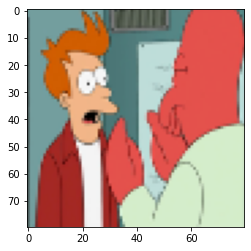

In [26]:
im = np.array(test[67]).reshape((80,80,3))
plt.imshow(im)


In [27]:
img_to_find = encoded_imgs[67]

In [28]:
img_to_find.shape

(3200,)

In [29]:
from scipy import spatial 
cosine_list = []
for index_image,xt in enumerate(encoded_imgs):
    result = 1 - spatial.distance.cosine(img_to_find, xt)
    cosine_list.append(dict({'res':result, 'i':index_image}))

In [30]:
from operator import itemgetter
cosine_list.sort(key=itemgetter('res'), reverse=True)

67
237
261
86
47
229
10
137
39
97


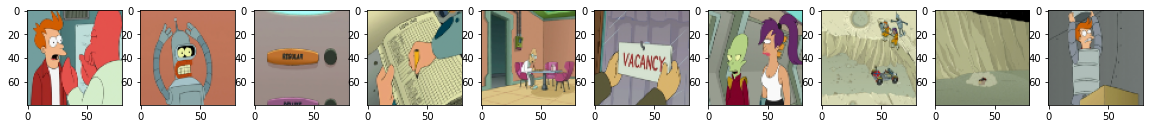

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=10,figsize=(20, 4))
plt.gray()
for indice, row in enumerate(ax):
    print (cosine_list[indice]['i'])
    row.imshow(X_test[cosine_list[indice]['i']].reshape(80,80,3))

plt.show()

In [36]:
from tensorflow.keras.applications import InceptionV3
xception = InceptionV3(weights='imagenet', include_top=False, input_shape=(80,80,3))

87910968/87910968 [==============================] - 15s 0us/step


In [37]:
encoded_imgs = xception.predict(X_test).reshape(X_test.shape[0],-1)

10/10 [==============================] - 2s 55ms/step


In [38]:
xception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_20[0][0]'] 
          

 conv2d_34 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 3, 3, 128)   384         ['conv2d_35[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_61[0][0]'] 
          

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

In [39]:
encoded_imgs.shape

(300, 2048)

In [40]:
img_to_find = encoded_imgs[67]

In [41]:
from scipy import spatial 
cosine_list = []
for index_image,xt in enumerate(encoded_imgs):
    result = 1 - spatial.distance.cosine(img_to_find, xt)
    cosine_list.append(dict({'res':result, 'i':index_image}))

In [42]:
from operator import itemgetter
cosine_list.sort(key=itemgetter('res'), reverse=True)

67
55
224
79
166
138
14
169
195
190


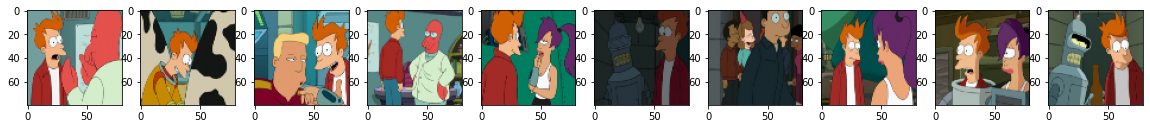

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=10,figsize=(20, 4))
plt.gray()
for indice, row in enumerate(ax):
    print (cosine_list[indice]['i'])
    row.imshow(X_test[cosine_list[indice]['i']].reshape(80,80,3))

plt.show()